<h1><center><b>American Sign Language Fingerspelling Recognition using ML model</b></center></h1>

<span style="font-family:cursive;font-size:15px;">Hello Everyone, This is my first entry in Kaggle Competition, as I found this problem statement both noble and challenging at the same time. Hope you will like my work and together we can enhance this entire process. <b>If you like please do upvote and leave your valuable comments</b> ..Happy Learning !!😊 </span> 


<div style="font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
What is Fingerspelling ?

Fingerspelling, also known as dactylology, is the method of spelling words using hand movements. The fingerspelling alphabet is a part of sign language and is used to spell out names of people and places for which there is no sign. Fingerspelling is also used to clarify a sign to the person who is unable to read the signer.

The manual alphabets (also known as finger alphabets) have often been used in deaf education and thus became a distinct part of several sign languages, such as The British Sign Language (BSL), The American Sign Language (ASL) and so on. 
    
[source](http://https://lead-academy.org/blog/what-is-fingerspelling/)
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
Fingerspelling uses hand shapes that represent individual letters to convey words. While fingerspelling is only a part of ASL, it is often used for communicating names, addresses, phone numbers, and other information commonly entered on a mobile phone.
</p>
</div>


<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">

<h2><center> Comparison Between Finger-spelling and Sign Language </center></h2>
<table>
  <tr>
    <th style="width:60%">Features</th>
    <th>Fingerspelling</th>
    <th>Sign Language</th>
  </tr>
  <tr>
    <td>Stand-alone Language</td>
    <td><i class="fa fa-remove"></i></td>
    <td><i class="fa fa-check"></i></td>
  </tr>
  <tr>
    <td>Grammatical Structures/Syntaxes</td>
    <td><i class="fa fa-remove"></i></td>
    <td><i class="fa fa-check"></i></td>
  </tr>
    <tr>
    <td>Communicating Non Standard words</td>
    <td><i class="fa fa-check"></i></td>
    <td><i class="fa fa-remove"></i></td>
  </tr>
   <tr>
    <td>Less time needed for Comunication</td>
    <td><i class="fa fa-remove"></i></td>
    <td><i class="fa fa-check"></i></td>
  </tr>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">
In Summary : We cannot use fingerspelling as a substitute for sign language. It is used in signing but only for words that do not have a sign or when it is unknown.
It is not possible to use fingerspelling as the primary method of communication of the deaf because it would take hours to communicate a few minute message through fingerspelling. As such, sign language is far more effective than fingerspelling for communication.
</p>
</div>


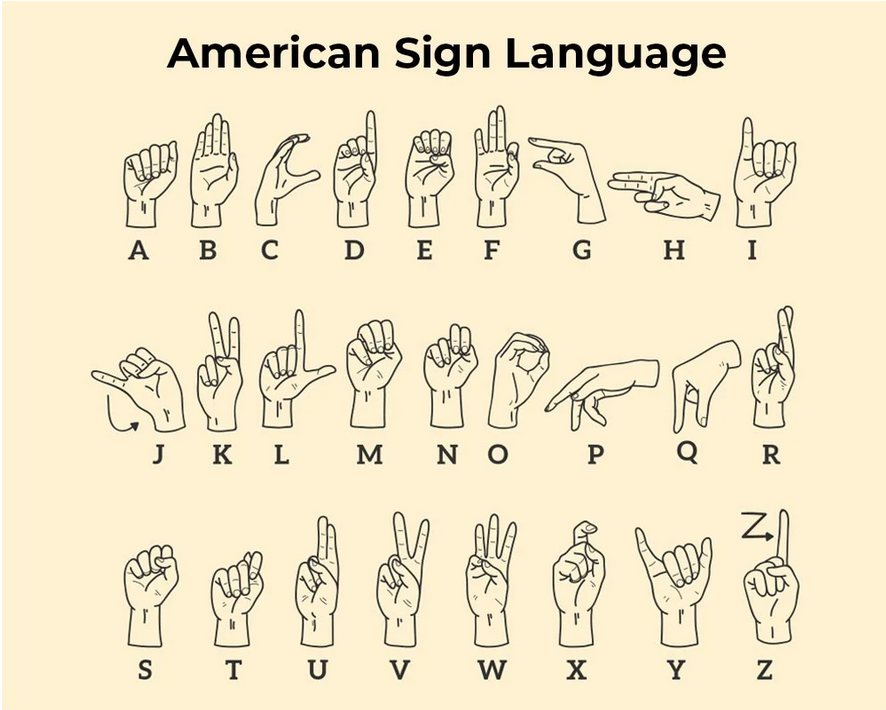

<div style="font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
Now, that we have a basic undersyanding of the subject, lets dive deep more into the problem statement and data to analyze it further !!
    
    
    
    
**This entire Notebook will be divided into the following sections:** 
1. Training Data Exploration
2. Test Data Exploration
3. Data Visulization
4. ML model Training
5. ML model Prediction
6. Performace Evaluation
    
*Note: If needed will update this section in the future edits *
   
 </div>

<h2><center><b><i>1. Training Data Exploration</i></b></center></h2>

In [44]:
#import dependencies
import numpy as np 
import pandas as pd 
import os

import polars as pl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
#lets count the number of files in train and test data
dir_path = '/kaggle/input/asl-fingerspelling/train_landmarks'
print("number of parquet files in training data",len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

dir_path = '/kaggle/input/asl-fingerspelling/supplemental_landmarks'
print("number of parquet files in supplemental/test data",len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

number of parquet files in training data 68
number of parquet files in supplemental/test data 53


In [5]:
train_data = pd.read_csv("/kaggle/input/asl-fingerspelling/train.csv")
print("the size of train data",train_data.shape)
train_data.head()

the size of train data (67287, 5)


,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816862427,0,hentaihubs.com
3,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
4,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane


In [6]:
print("***** Basic Information from Train data *********")
print(f"Number of unique training data files : {len(train_data['file_id'].unique()):,}")
print(f"Total number of unique sequences in training data files : {len(train_data['sequence_id'].unique()):,}")
print(f"Number of unique participants : {len(train_data['participant_id'].unique()):,}")

***** Basic Information from Train data *********
Number of unique training data files : 68
Total number of unique sequences in training data files : 67,287
Number of unique participants : 94


In [7]:
#checking if a specific phrase is having a unique sequence_id
seq_by_phrase = train_data.groupby('phrase')['sequence_id'].count()
seq_by_phrase

phrase
+20-0026-4265-973              1
+20-0046-511-1729-83           1
+20-023-083-9216               1
+20-025-8864-283-90-64         1
+20-03-02-5920-6148            1
                              ..
zzxiabei.com                   2
~bojovicd/nann/51919           1
~leslita/shhi                  1
~moravec/an-der-alten-aa       2
~schweigh/djurmo-land.html/    3
Name: sequence_id, Length: 46518, dtype: int64

In [8]:
#So there are cases, where a phase can have multiple sequences. For ex: '~schweigh/djurmo-land.html/' based on multiple participants
#We can further analyse the parquet files to check if the landmarks are same or different
train_data.groupby('phrase').get_group('~schweigh/djurmo-land.html/')

,path,file_id,sequence_id,participant_id,phrase
7774,train_landmarks/234418913.parquet,234418913,2066830536,93,~schweigh/djurmo-land.html/
38413,train_landmarks/1341528257.parquet,1341528257,1402991614,219,~schweigh/djurmo-land.html/
63277,train_landmarks/2026717426.parquet,2026717426,1209174392,135,~schweigh/djurmo-land.html/


In [9]:
#getting the rows from a draframe whwre the participant id is '0'
train_data[train_data['participant_id'] == 0]

,path,file_id,sequence_id,participant_id,phrase
2,train_landmarks/5414471.parquet,5414471,1816862427,0,hentaihubs.com
36,train_landmarks/5414471.parquet,5414471,1817940885,0,angeli/bombillas-a-presion
66,train_landmarks/5414471.parquet,5414471,1818863391,0,957 pomeroy lake
220,train_landmarks/5414471.parquet,5414471,1824170041,0,8107 north hillerman way
313,train_landmarks/5414471.parquet,5414471,1826740987,0,www.broomebeachresort.com
...,...,...,...,...,...
67005,train_landmarks/2118949241.parquet,2118949241,378981222,0,967 10 3/4
67093,train_landmarks/2118949241.parquet,2118949241,382055730,0,860 palace row
67130,train_landmarks/2118949241.parquet,2118949241,383342877,0,sugar land tx
67171,train_landmarks/2118949241.parquet,2118949241,384415796,0,mari combs


In [10]:
#getting the participant id from the first row
train_data.participant_id.iloc[0]

217

In [11]:
#Sequence per participant
# seq_per_participant = (
#     train_data.groupby('participant_id')
#     .agg(pl.col("sequence_id").unique().count())
#     .with_columns(pl.col("participant_id").cast(str))
# )
seq_per_participant = train_data.groupby("participant_id")['sequence_id'].count().to_frame().reset_index()
seq_per_participant.rename(columns = {'sequence_id':'count of sequences'},inplace=True)
seq_per_participant.head()

,participant_id,count of sequences
0,0,811
1,1,681
2,2,885
3,4,582
4,6,872


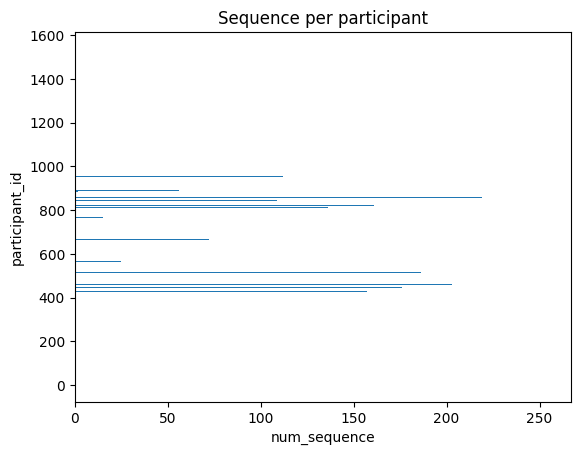

In [12]:
#making subplots so that can see every participant ids
fig,ax = plt.subplots()
ax.barh(seq_per_participant['count of sequences'],seq_per_participant['participant_id'])
ax.set(xlabel = "num_sequence",ylabel="participant_id",title = "Sequence per participant")
plt.show()

In [13]:
train_data = train_data[['path','sequence_id','phrase']]
train_data.head()

,path,sequence_id,phrase
0,train_landmarks/5414471.parquet,1816796431,3 creekhouse
1,train_landmarks/5414471.parquet,1816825349,scales/kuhaylah
2,train_landmarks/5414471.parquet,1816862427,hentaihubs.com
3,train_landmarks/5414471.parquet,1816909464,1383 william lanier
4,train_landmarks/5414471.parquet,1816967051,988 franklin lane


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67287 entries, 0 to 67286
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   path         67287 non-null  object
 1   sequence_id  67287 non-null  int64 
 2   phrase       67287 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [15]:
print("Checking ocuurence of phrases:\n")
train_data['phrase'].value_counts()

Checking ocuurence of phrases:



surprise az               17
yonkers new york          16
fort worth tx             16
raleigh north carolina    15
buffalo ny                14
                          ..
doris howe                 1
98 choctaw school          1
+33-949-513-01-43          1
935-833-3505               1
994-392-3850               1
Name: phrase, Length: 46518, dtype: int64

In [16]:
print("Number of unique phrases in train data",train_data['phrase'].nunique())

Number of unique phrases in train data 46518


In [17]:
# #importing libraries for visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig,ax = plt.subplots(3,3,figsize=(10,7))
# fig.tight_layout()
# %matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

#create bar plot to visualize frequency of each phrase
#train_data['phrase'].value_counts().plot(kind='bar', xlabel='phrase', ylabel='Count', rot=1)

### So there is no null values present in the dataframe, and also as this train_data is just a reference to the actual data file, will do further analysis on those parquet files

<h2><center><b><i>2. Test Data Exploration</i></b></center></h2>

**"supplemental_metadata" data is provided to test the model**

In [18]:
supp_meta_data = pd.read_csv("/kaggle/input/asl-fingerspelling/supplemental_metadata.csv")
supp_meta_data

,path,file_id,sequence_id,participant_id,phrase
0,supplemental_landmarks/33432165.parquet,33432165,1535467051,251,coming up with killer sound bites
1,supplemental_landmarks/33432165.parquet,33432165,1535499058,239,we better investigate this
2,supplemental_landmarks/33432165.parquet,33432165,1535530550,245,interesting observation was made
3,supplemental_landmarks/33432165.parquet,33432165,1535545499,38,victims deserve more redress
4,supplemental_landmarks/33432165.parquet,33432165,1535585216,254,knee bone is connected to the thigh bone
...,...,...,...,...,...
52953,supplemental_landmarks/2100073719.parquet,2100073719,1090866442,239,want to join us for lunch
52954,supplemental_landmarks/2100073719.parquet,2100073719,1090966452,95,this phenomenon will never occur
52955,supplemental_landmarks/2100073719.parquet,2100073719,1091005846,40,the winner of the race
52956,supplemental_landmarks/2100073719.parquet,2100073719,1091011550,241,are you sure you want this


In [19]:
supp_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52958 entries, 0 to 52957
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            52958 non-null  object
 1   file_id         52958 non-null  int64 
 2   sequence_id     52958 non-null  int64 
 3   participant_id  52958 non-null  int64 
 4   phrase          52958 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.0+ MB


In [20]:
supp_meta_data['phrase'].value_counts()

why do you ask silly questions            117
find a nearby parking spot                117
apartments are too expensive              116
what to do when the oil runs dry          115
that agreement is rife with problems      115
                                         ... 
saving that child was an heroic effort     17
you will loose your voice                  16
everybody looses in custody battles        15
if at first you do not succees              1
my favorite place is to visit               1
Name: phrase, Length: 508, dtype: int64

**There are total 508 unique phrases for testing , in which the most occuring phrase is "why do you ask silly questions"**

In [21]:
supp_meta_data = supp_meta_data[['path','file_id','sequence_id','phrase']]
supp_meta_data

,path,file_id,sequence_id,phrase
0,supplemental_landmarks/33432165.parquet,33432165,1535467051,coming up with killer sound bites
1,supplemental_landmarks/33432165.parquet,33432165,1535499058,we better investigate this
2,supplemental_landmarks/33432165.parquet,33432165,1535530550,interesting observation was made
3,supplemental_landmarks/33432165.parquet,33432165,1535545499,victims deserve more redress
4,supplemental_landmarks/33432165.parquet,33432165,1535585216,knee bone is connected to the thigh bone
...,...,...,...,...
52953,supplemental_landmarks/2100073719.parquet,2100073719,1090866442,want to join us for lunch
52954,supplemental_landmarks/2100073719.parquet,2100073719,1090966452,this phenomenon will never occur
52955,supplemental_landmarks/2100073719.parquet,2100073719,1091005846,the winner of the race
52956,supplemental_landmarks/2100073719.parquet,2100073719,1091011550,are you sure you want this


### **Analyze Parquet Files**

In [22]:
train_data['path'][0]

'train_landmarks/5414471.parquet'

In [23]:
pq_data_sample = pd.read_parquet(os.path.join('/kaggle/input/asl-fingerspelling',train_data['path'][0]), engine='pyarrow')
pq_data_sample

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1816796431,0,0.710588,0.699951,0.705657,0.691768,0.699669,0.701980,0.709724,0.610405,0.712660,...,-0.245855,-0.269148,-0.129743,-0.251501,-0.278687,-0.266530,-0.152852,-0.257519,-0.275822,-0.266876
1816796431,1,0.709525,0.697582,0.703713,0.691016,0.697576,0.700467,0.709796,0.616540,0.713729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,2,0.711059,0.700858,0.706272,0.693285,0.700825,0.703319,0.711549,0.615606,0.715143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,3,0.712799,0.702518,0.707840,0.694899,0.702445,0.704794,0.712483,0.625044,0.715677,...,-0.370770,-0.408097,-0.185217,-0.325494,-0.343373,-0.328294,-0.203126,-0.315719,-0.326104,-0.314282
1816796431,4,0.712349,0.705451,0.709918,0.696006,0.705180,0.706928,0.712685,0.614356,0.714875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848182207,296,0.657136,0.635888,0.643259,0.619031,0.633084,0.631827,0.630708,0.533120,0.626672,...,-0.143147,-0.139659,-0.066276,-0.130910,-0.127341,-0.106674,-0.083439,-0.124994,-0.119394,-0.101404
1848182207,297,0.655706,0.635570,0.642730,0.618637,0.632830,0.631554,0.630344,0.531868,0.626445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848182207,298,0.653681,0.636057,0.643054,0.618643,0.633258,0.631800,0.630059,0.531178,0.625990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pq_data_sample.reset_index(inplace=True)
pq_data_sample.head()

,sequence_id,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
0,1816796431,0,0.710588,0.699951,0.705657,0.691768,0.699669,0.701980,0.709724,0.610405,...,-0.245855,-0.269148,-0.129743,-0.251501,-0.278687,-0.266530,-0.152852,-0.257519,-0.275822,-0.266876
1,1816796431,1,0.709525,0.697582,0.703713,0.691016,0.697576,0.700467,0.709796,0.616540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1816796431,2,0.711059,0.700858,0.706272,0.693285,0.700825,0.703319,0.711549,0.615606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1816796431,3,0.712799,0.702518,0.707840,0.694899,0.702445,0.704794,0.712483,0.625044,...,-0.370770,-0.408097,-0.185217,-0.325494,-0.343373,-0.328294,-0.203126,-0.315719,-0.326104,-0.314282
4,1816796431,4,0.712349,0.705451,0.709918,0.696006,0.705180,0.706928,0.712685,0.614356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Lets decode the relation ship between train data and parquet files.**

In [25]:
pq_data_sample['sequence_id'].value_counts()

1829675083    672
1819357924    584
1843134322    532
1841427117    510
1843964998    497
             ... 
1846579165      6
1824833872      3
1832630976      2
1823387098      2
1818239060      1
Name: sequence_id, Length: 1000, dtype: int64

So as we can see, there are total of **1000** unique sequence in this specific parquet file(Have taken the first train file id). Lets take a random sequence that is, 1846579165

In [26]:
#extracting a specific text
target_phrase = train_data[train_data['sequence_id'] ==1846579165]['phrase'].values[0]
target_phrase

'349 jay smith'

In [28]:
#filtering dataframe with a specific column value
pq_data_sample = pq_data_sample.loc[pq_data_sample['sequence_id'] == 1846579165]
pq_data_sample

,sequence_id,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
152106,1846579165,0,0.698347,0.686139,0.692078,0.675805,0.685958,0.689192,0.699700,0.559114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152107,1846579165,1,0.699704,0.682773,0.689875,0.671543,0.682135,0.685083,0.695055,0.559847,...,-0.165357,-0.196206,-0.087760,-0.142547,-0.184010,-0.210506,-0.104040,-0.162469,-0.192900,-0.210434
152108,1846579165,2,0.691656,0.676229,0.684249,0.668090,0.676079,0.680348,0.693748,0.556473,...,-0.141221,-0.167821,-0.075916,-0.120008,-0.150705,-0.169411,-0.096573,-0.141227,-0.158980,-0.167100
152109,1846579165,3,0.691077,0.682921,0.689736,0.672530,0.682604,0.685867,0.696515,0.558431,...,-0.132758,-0.162778,-0.062081,-0.110572,-0.143325,-0.164732,-0.081818,-0.132547,-0.155688,-0.168465
152110,1846579165,4,0.694414,0.681735,0.688671,0.670306,0.681212,0.684187,0.694261,0.557266,...,-0.108348,-0.144160,-0.043081,-0.095879,-0.140963,-0.170097,-0.066275,-0.123801,-0.157156,-0.177416
152111,1846579165,5,0.691450,0.682584,0.689038,0.671190,0.682091,0.685018,0.694845,0.556075,...,-0.099828,-0.130058,-0.049106,-0.093725,-0.128770,-0.150820,-0.064984,-0.115090,-0.136328,-0.147190


In [49]:
len(pq_data_sample)

6

[x/y/z]_[type]_[landmark_index] - There are now 1,629 spatial coordinate columns for the x, y and z coordinates for each of the 543 landmarks. The type of landmark is one of ['face', 'left_hand', 'pose', 'right_hand']

**So for the phrase '349 jay smith' there are 6 train_landmarks/ frames**

<h2><center><b><i>3. Data Visualization</i></b></center></h2>

The functions for this visualization was modified from this [notebook](http://https://www.kaggle.com/code/tatamikenn/islr-eda-let-s-get-landmarks-animated?scriptVersionId=124884880)

Also for understanding the landmarks co-ordinates : https://developers.google.com/mediapipe/solutions/vision/hand_landmarker


In [37]:
pq_data_sample

,sequence_id,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
152106,1846579165,0,0.698347,0.686139,0.692078,0.675805,0.685958,0.689192,0.699700,0.559114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152107,1846579165,1,0.699704,0.682773,0.689875,0.671543,0.682135,0.685083,0.695055,0.559847,...,-0.165357,-0.196206,-0.087760,-0.142547,-0.184010,-0.210506,-0.104040,-0.162469,-0.192900,-0.210434
152108,1846579165,2,0.691656,0.676229,0.684249,0.668090,0.676079,0.680348,0.693748,0.556473,...,-0.141221,-0.167821,-0.075916,-0.120008,-0.150705,-0.169411,-0.096573,-0.141227,-0.158980,-0.167100
152109,1846579165,3,0.691077,0.682921,0.689736,0.672530,0.682604,0.685867,0.696515,0.558431,...,-0.132758,-0.162778,-0.062081,-0.110572,-0.143325,-0.164732,-0.081818,-0.132547,-0.155688,-0.168465
152110,1846579165,4,0.694414,0.681735,0.688671,0.670306,0.681212,0.684187,0.694261,0.557266,...,-0.108348,-0.144160,-0.043081,-0.095879,-0.140963,-0.170097,-0.066275,-0.123801,-0.157156,-0.177416
152111,1846579165,5,0.691450,0.682584,0.689038,0.671190,0.682091,0.685018,0.694845,0.556075,...,-0.099828,-0.130058,-0.049106,-0.093725,-0.128770,-0.150820,-0.064984,-0.115090,-0.136328,-0.147190


In [50]:
def get_points(df,landmark_name):
    X = []
    Y = []
    
    for index,col_name in enumerate(df.columns.tolist()):
        if "x_"+landmark_name in col_name:
            X.append(df[col_name])
        elif "y_"+landmark_name in col_name:
            Y.append(df[col_name])
    return X,Y

In [51]:
def animate(frame):
    f = pq_data_sample[pq_data_sample['frame']==frame]
    fc_x,fc_y = [],[]
    lh_x,lh_y = [],[]
    rh_x,rh_y = [],[]
    pos_x,pos_y = [],[]
    
    fc_x,fc_y = get_points(f,'face')
    lhx,lhy = get_points(f,'left_hand')
    rh_x,rh_y = get_points(f,'right_hand')
    pos_x,pos_y = get_points(f,'pose')
    
    ax.clear()
    ax.plot(fc_x,fc_y)
    ax.plot(lh_x,lh_y)
    ax.plot(rh_x,rh_y)
    ax.plot(pos_x,pos_y)    

Animation plotting for phrase : 349 jay smith


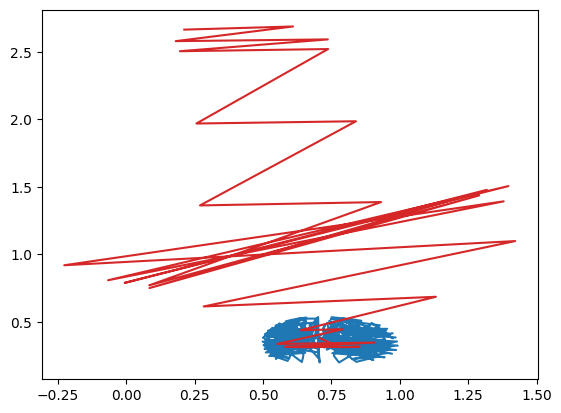

In [52]:
print(f"Animation plotting for phrase : {target_phrase}")

fig,ax = plt.subplots()
#_,_ = ax.plot([],[])

phrase_animation = FuncAnimation(fig, func=animate,frames=pq_data_sample.frame.unique())
HTML(phrase_animation.to_html5_video())